In [1]:
# import necessary modules
import numpy as np
import cv2, matplotlib.pyplot as plt
%matplotlib inline

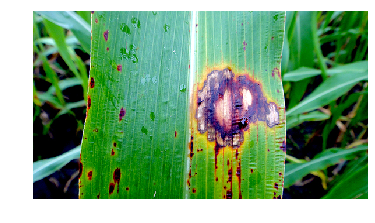

In [2]:
# read image and show
img = cv2.imread('leaf_image.jpg') # in BGR mode
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

Threshold limit: 103.0


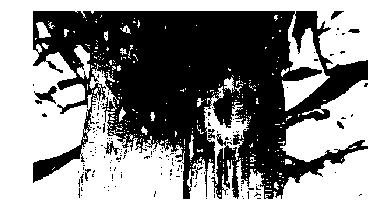

In [3]:
# convert to gray scale first
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

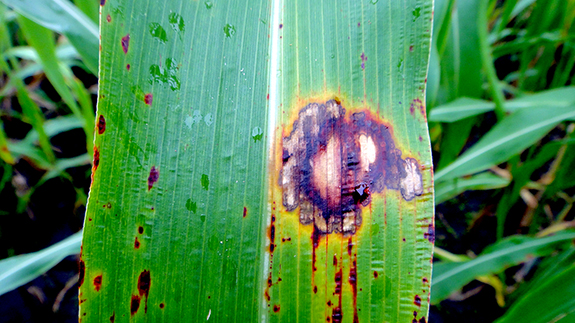

In [4]:
from PIL import Image

%matplotlib inline  

#Import an image
image = Image.open("leaf_image.jpg")

image

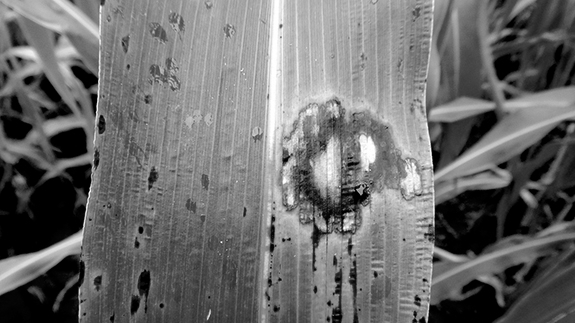

In [5]:
im = image.convert('L')

im

In [6]:
array(im)

NameError: name 'array' is not defined

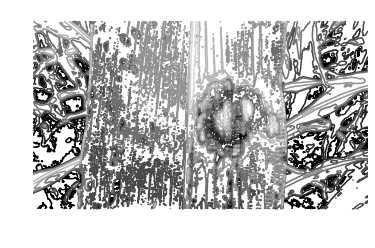

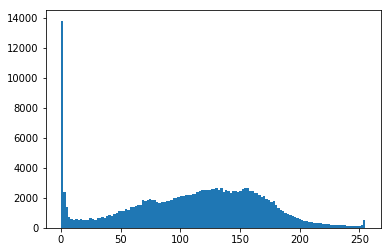

In [7]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(im, origin='image')
axis('equal')
axis('off')


figure()


hist(array(im).flatten(), 128)

show()

Threshold limit: 103.0


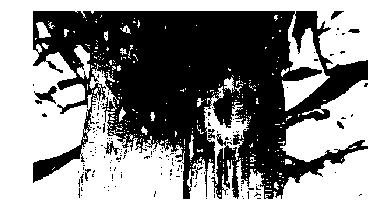

In [8]:
# performing otsu's binarization
# convert to gray scale first
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

In [9]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

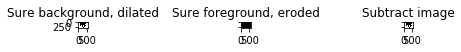

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.imshow(sure_bg, cmap = 'gray')
ax1.set_title('Sure background, dilated')

ax2.imshow(sure_fg, cmap = 'gray')
ax2.set_title('Sure foreground, eroded')

ax3.imshow(unknown, cmap = 'gray')
ax3.set_title('Subtract image')

# fine tuning 
f.subplots_adjust(wspace=15.9)